 # EDA on Haberman Dataset
 
 * **Objective:**
    To observe the significance of each feature in the survival or non-survival of patient and to find most significant features by performing Univariate and Bi-variate analysis.

**Lets first understand what Haberman dataset is about?**

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings               # Reff: How to ignore deprecation warnings in Python....www.kite.com
warnings.filterwarnings('ignore')

haberman= pd.read_csv('haberman.csv')

print(haberman.head(10))
print('\nColumns:',haberman.columns)
print('\nShape', haberman.shape)

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2
8   34    66      9       2
9   34    58     30       1

Columns: Index(['age', 'year', 'nodes', 'status'], dtype='object')

Shape (306, 4)





**Here in this dataset, there are 306 rows, 4 columns ( age, year, nodes and status) and 3 features(age,year,nodes). 
'status' column has the categorical data and have 2 categories(1,2).All other columns contains variable datapoints. In 'status' column '1' is for patients who survived and '2' is for patients who do not-survived.** 


* Lets see some basic information about dataset

In [2]:
print(haberman.info())

print('\n',haberman['status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None

 1    225
2     81
Name: status, dtype: int64


* **Observation:**
  There are 225 patients who have survived 5 years or longer and 81 patients who have not-survived or died within 5 years. This dataset is imbalanced dataset.


In [93]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Age varies from 30 to 83, year from 58 to69 and nodes from 0 to 52.

## Univariate Analysis

## Using PDF

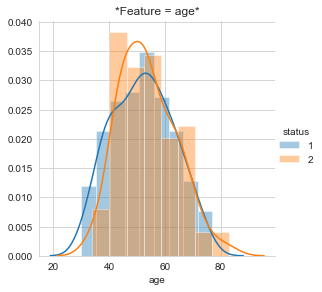

In [15]:
sns.set_style("whitegrid")
g=sns.FacetGrid(haberman, hue='status', size=4)
g=g.map(sns.distplot, 'age').add_legend().set(title='*Feature = age*')
plt.show()


* **Observation:** At the age from 30 to 33, everyone has survived. But after 33 chance of non-survival is increasing till age 50.Although the dataset is imbalanced, it can be seen that, at the age 40 to 60 there is proportionately more chance of non-survival of patient than survival.Also after the age 77, there is almost no chance of survival. As the data is imbalanced and most of the plot is overlapping,it is difficult to say that 'age' is the significant feature to classify survivor and non-survivor.

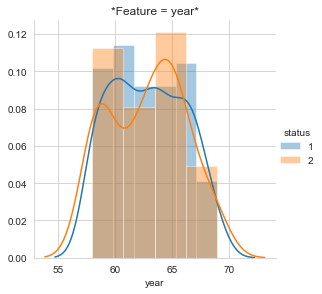

In [16]:
h=sns.FacetGrid(haberman, hue='status', size=4)
h=h.map(sns.distplot, 'year').add_legend().set(title='*Feature = year*')
plt.show()


* **Observation:** If 'year' is taken as a feature, it can be seen that most of the plot is overlapped and PDF curves are crossing each other. Although the operation is carried out, there is no certainity of survival of patient within 5 years. It is not possible to classify patients using 'year' as a feature.

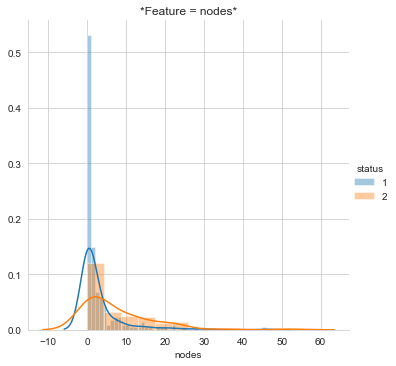

In [17]:
i= sns.FacetGrid(haberman, hue='status',size= 5)
i=i.map(sns.distplot, 'nodes').add_legend().set(title='*Feature = nodes*')
plt.show()

* **Observation:** In the range of node between 0 to 5 approximately, chance of survival is proportionately greater than the chance of non-survival. Also as nodes increases chance of survival decreases. Here 'nodes' can be more significant than any other feature to classify because PDF curves are much better seperated than features 'age' and 'year'. 

**Until now significance of feature is in order of: nodes > age > year.**

## Using CDF

We have two categories, survived and non-survived patients, now lets see, how every feature differentiate them well.

In [38]:
survived=haberman.loc[haberman['status']==1]
not_survived=haberman.loc[haberman['status']==2]


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


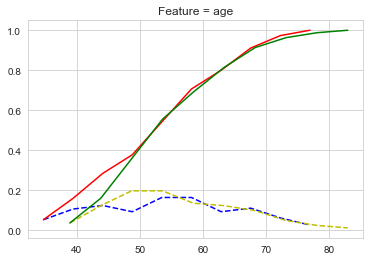

In [58]:
#Lets take 'age' as feature.

#for survived
counts, bin_edges = np.histogram(survived['age'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('Feature = age')
plt.plot(bin_edges[1:],pdf,'b--')
plt.plot(bin_edges[1:], cdf,'r-')

#for non-survived

counts, bin_edges = np.histogram(not_survived['age'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'y--')
plt.plot(bin_edges[1:], cdf,'g-')

# Here Red line is CDF of survived class and Blue dotted line is PDF
# Here Green line is CDF of not-survived class and Yellow dotted line is PDF

* **Observation:** In the above plot Red curve denotes the CDF of survived patients and Green curve denotes CDF of non-survived patients. Both curves are intersecting each other and not well seperated. From age 48 (approx) both survived and not-survived patients have almost the same curve. At age 67 (approx), there are equal percentage of survived and not-survived patients. So using CDF, 'age' feature do not have that much significance in survival or non-survival of the patients. 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


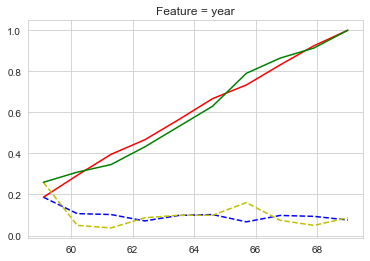

In [59]:
#Lets take 'year' as feature.

#for survived
counts, bin_edges = np.histogram(survived['year'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('Feature = year')
plt.plot(bin_edges[1:],pdf,'b--')
plt.plot(bin_edges[1:], cdf,'r-')

#for non-survived

counts, bin_edges = np.histogram(not_survived['year'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'y--')
plt.plot(bin_edges[1:], cdf,'g-')

# Here Red line is CDF of survived class and Blue dotted line is PDF
# Here Green line is CDF of not-survived class and Yellow dotted line is PDF

* **Observation:** In the above plot Red curve denotes the CDF of survived patients and Green curve denotes CDF of non-survived patients. Same as the 'age' feature, here, both curves are intersecting each other and not well seperated. Although a different year of operation, patients have the almost equal chance of survival and non-survival. So using CDF, 'year' feature also do not have that much significance in survival or non-survival of the patients. 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


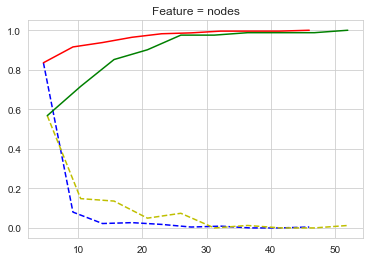

In [60]:
#Lets take 'nodes' as feature.

#for survived
counts, bin_edges = np.histogram(survived['nodes'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title('Feature = nodes')
plt.plot(bin_edges[1:],pdf,'b--')
plt.plot(bin_edges[1:], cdf,'r-')

#for non-survived

counts, bin_edges = np.histogram(not_survived['nodes'], bins=10,density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'y--')
plt.plot(bin_edges[1:], cdf,'g-')

# Here Red line is CDF of survived class and Blue dotted line is PDF
# Here Green line is CDF of not-survived class and Yellow dotted line is PDF

* **Observation:** In the above plot Red curve denotes the CDF of survived patients and Green curve denotes CDF of non-survived patients. Unlike 'age' and 'year' feature, here, both curves are very well seperated till node 25. Here it depicts that, having less node gives more certainity of survival than non-survival. At node 15, percentage of survived patients are 95% (approx) and not-survived patients are 85% (approx).  So using CDF, 'nodes' feature have much significance in survival or non-survival of the patients than other two features. 

**By performing CDF analysis, significance of feature is still in same order: nodes > age > year**

## Using Box Plot

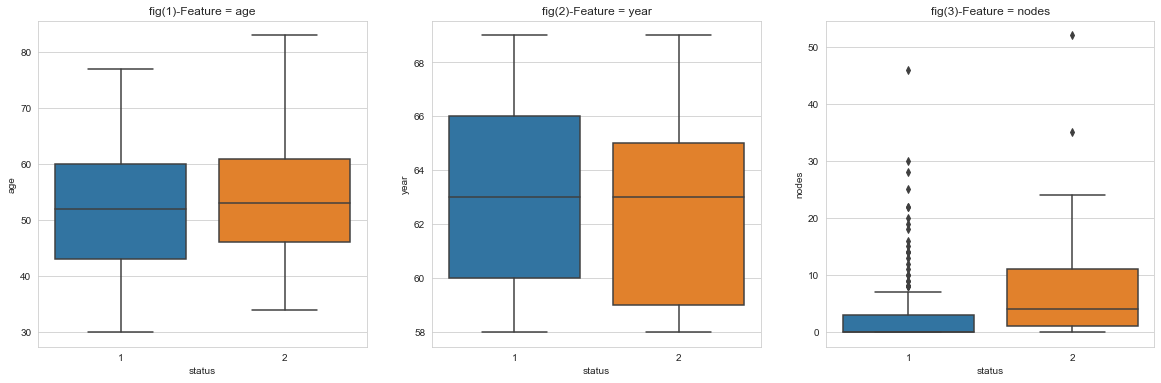

In [79]:
from matplotlib import gridspec     
# Feature = age
fig=plt.figure(1)
fig.set_figheight(6)          # Reff: How to create different subplot sizes in matplotlib....geeksforgeeks.org
fig.set_figwidth(20)
plt.subplot(131)
sns.boxplot(x='status', y='age', data= haberman)
plt.title('fig(1)-Feature = age')

# Feature = year
plt.subplot(132)
sns.boxplot(x='status', y='year', data=haberman)
plt.title('fig(2)-Feature = year')

#Feature = nodes
plt.subplot(133)
sns.boxplot(x='status', y='nodes', data= haberman)
plt.title('fig(3)-Feature = nodes')

plt.show()

# Here Blue color denotes Survived class and Red color denotes Not-Survived class.

* **Observations:**

* **fig(1)-Feature = age :** 25th, 50th and 75th percentile of both survived and not-survived are almost equal. 50th percentile of both classes are age 52 and age 53 (approx) resepctively, which are almost same, but 25th percentile value shows that smaller the age, more is the chance of survival. Still 'age' is not the significant feature as both classes have almost equal quantile values.


* **fig(2)-Feature = year :** 50th percentile of both the class are at year 63. 25th percentile values shows that year before 60 has the more chance of non-survival, but after year 60, it cannot be well defferentiated as both class have overlapping quantile values.


* **fig(3)-Feature = nodes :** This figure clearly depicts that node value from 0 to 5 has more chance of survival. Quantile values are diffrerent for each class and not overlapping. Here 75th percentile value shows that almost all the survived patients has the node value less than 5. From the 'nodes' feature, we can very well classifiy the survived and not-survived patients. Therefore 'nodes' is much more considerable feature than other two features.

## Using Violin Plot 

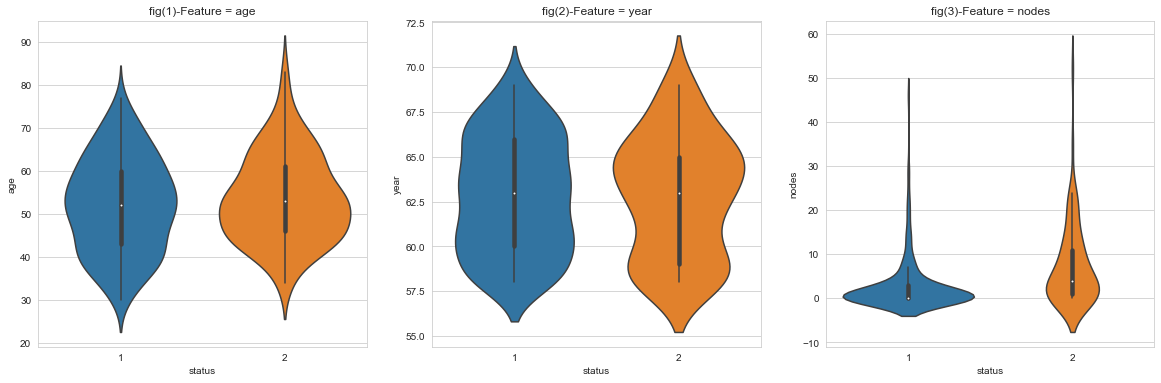

In [80]:
fig=plt.figure(1)
fig.set_figheight(6)          # Reff: How to create different subplot sizes in matplotlib....geeksforgeeks.org
fig.set_figwidth(20)

# Feature = age
plt.subplot(131)
sns.violinplot(x='status', y='age', data= haberman)
plt.title('fig(1)-Feature = age')

# Feature = year
plt.subplot(132)
sns.violinplot(x='status', y='year', data=haberman)
plt.title('fig(2)-Feature = year')

#Feature = nodes
plt.subplot(133)
sns.violinplot(x='status', y='nodes', data= haberman)
plt.title('fig(3)-Feature = nodes')

plt.show()

* **Observation:**
    Feature 'age' and 'year' has almost same spread/density between certain range. In the fig(3), survived patients shows more spread near to the zero but not-survived patients do not have that much spread in the same range of nodes. This figure very well differentiates survived and not-survived. So 'nodes' is the most significant feature.
    


## Bi-variate Analysis







## Using 2D Scatter Plot 

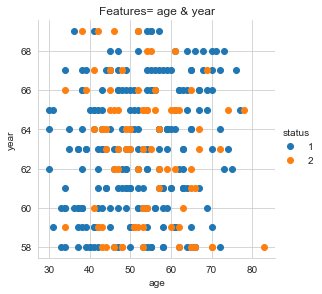

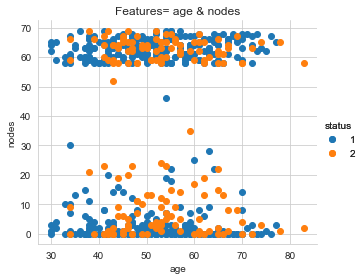

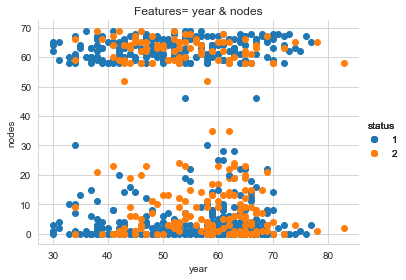

In [91]:

g=sns.FacetGrid(haberman, hue='status', size=4)

# Features(age,year)
a=g.map(plt.scatter, 'age','year').add_legend()
plt.title('Features= age & year')
plt.show()

# Features(age,nodes)
b=g.map(plt.scatter, 'age','nodes').add_legend()
plt.title('Features= age & nodes')
plt.show()

# Features(year,nodes)
c=g.map(plt.scatter, 'year','nodes').add_legend()
plt.title('Features= year & nodes')
plt.show()

* **Observation:**
    Above 2D scatter plot shows that, if 2 features are used to classify, most of the points overlap each other. Differentiating becomes too hard as between certain range, points from both class (i.e. survived and not-survived) are present in that range. Use of two features makes it difficult to find significane of features and thus classify based on those features.

## Using Pair Plot

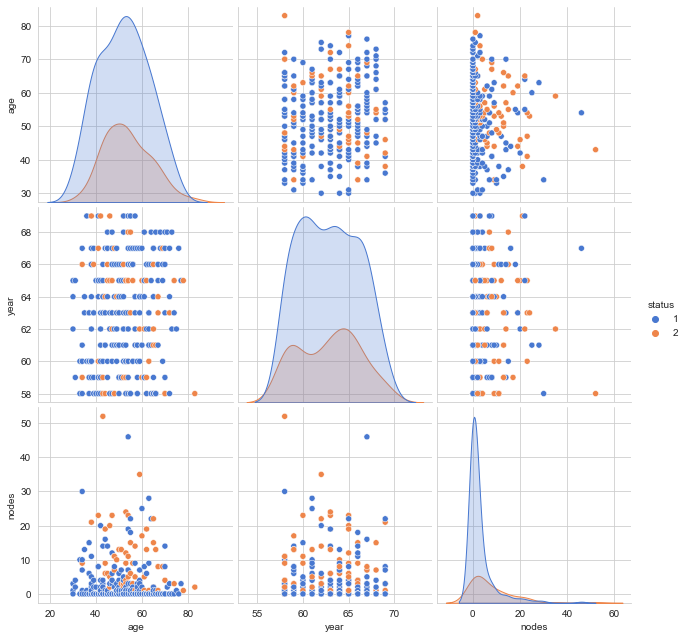

In [90]:
plt.close()
sns.pairplot(haberman, hue='status', size=3, palette='muted')
plt.show()

* **Observation:**
    If pair plot is considered, nodes and age features combined gives much more seperated points, than any other features combination. Still there are too much overlapping points which will reduces the significance of each other feature.
    
    
    

## Conclusion:


* **By performing univariate analysis, it is seen that 'nodes' is much more considerable feature which defferentiate both classes.**

* **By performing Bi-variate anaylysis, it has been clear that no any features combination can be helpful in the classification.**

* **'nodes', a single feature can be very significant in the classifiaction between survived and not-survived.**

* **Amongst the Univariate and Bi-variate analysis, Univariate analysis is much more useful to find out the significance of the feature in the Haberman Dataset.** 